# Tutorial 14: Data Handling in PyG (Part 1)

In [ ]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

1.12.1+cu113
     |████████████████████████████████| 7.9 MB 3.7 MB/s 
     |████████████████████████████████| 3.5 MB 7.4 MB/s 


In [1]:
import numpy as np
import torch
import torch_geometric.datasets as datasets
import torch_geometric.data as data
import torch_geometric.transforms as transforms
import networkx as nx
from torch_geometric.utils.convert import to_networkx

## Data

Let's create a dummy graph

In [2]:
embeddings = torch.rand((100, 16), dtype=torch.float)

In [3]:
rows = np.random.choice(100, 500)
cols = np.random.choice(100, 500)
edges = torch.tensor([rows, cols])

/home/user/anaconda3/envs/gnn/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
edges_attr = np.random.choice(3,500)

In [5]:
ys = torch.rand((100)).round().long()

Convert the graph information into a PyG Data object

In [6]:
graph = data.Data(x=embeddings, edge_index=edges, edge_attr=edges_attr, y=ys)

In [7]:
graph

Data(x=[100, 16], edge_index=[2, 500], edge_attr=[500], y=[100])

Let's visualize the information contained in the data object

In [8]:
for prop in graph:
    print(prop)

('x', tensor([[0.7074, 0.6998, 0.3472,  ..., 0.4214, 0.9162, 0.8406],
        [0.1817, 0.2383, 0.0654,  ..., 0.8730, 0.5678, 0.2866],
        [0.8566, 0.6106, 0.7784,  ..., 0.4809, 0.3192, 0.6875],
        ...,
        [0.0338, 0.8082, 0.4665,  ..., 0.6577, 0.8019, 0.8696],
        [0.0920, 0.6424, 0.3201,  ..., 0.9704, 0.7353, 0.1449],
        [0.6611, 0.6635, 0.0473,  ..., 0.1450, 0.7180, 0.7524]]))
('edge_index', tensor([[23,  6, 58, 82, 62, 20, 48, 99,  0,  4, 96, 79, 55, 15, 94, 34, 39, 99,
         66, 37, 23, 67, 68, 99, 83, 96,  5, 58, 66, 79, 97, 35, 47, 67, 85, 65,
         80, 24, 31, 22, 15, 45, 61, 28, 71, 71, 50, 67, 28, 79, 63, 52,  3, 86,
          5, 17, 68, 88, 20, 52, 17, 44, 69, 12, 62, 41, 44, 56, 32, 39,  8, 35,
         68,  7, 48, 18, 39,  4, 79, 92,  1, 20, 29, 82, 58, 20,  1, 99, 39, 30,
          9, 61, 86, 93, 37, 29, 88, 40,  0, 72, 12, 87, 70, 17,  3,  7, 64, 46,
         55, 35, 26, 13, 73, 81, 36, 49, 50, 47, 31, 79,  3, 68, 31,  1, 27, 53,
         72, 

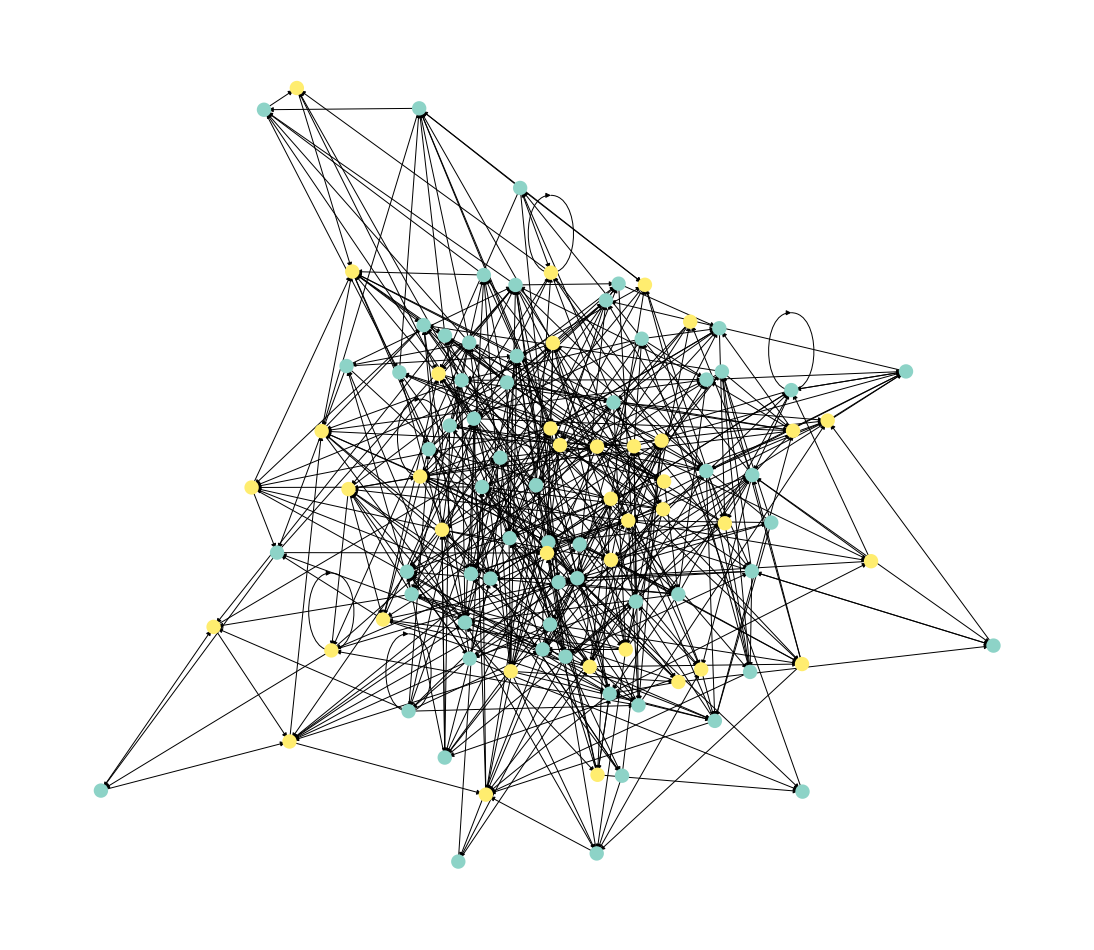

In [9]:
vis = to_networkx(graph)

node_labels = graph.y.numpy()

import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,13)) 
nx.draw(vis, cmap=plt.get_cmap('Set3'),node_color = node_labels,node_size=70,linewidths=6)
plt.show()

### Batch

With the Batch object we can represent multiple graphs as a single disconnected graph

In [10]:
graph2 = graph

In [11]:
batch = data.Batch().from_data_list([graph, graph2])

In [12]:
print("Number of graphs:",batch.num_graphs)
print("Graph at index 1:",batch[1])
print("Retrieve the list of graphs:\n",len(batch.to_data_list()))

Number of graphs: 2
Graph at index 1: Data(x=[100, 16], edge_index=[2, 500], edge_attr=[500], y=[100])
Retrieve the list of graphs:
 2


### Cluster

ClusterData groups the nodes of a graph into a specific number of cluster for faster computation in large graphs, then use ClusterLoader to load batches of clusters

In [13]:
#cluster = data.ClusterData(graph, 5)

In [14]:
#clusterloader = data.ClusterLoader(cluster)

### Sampler

For each convolutional layer, sample a maximum of nodes from each neighborhood (as in GraphSAGE)

In [15]:
sampler = data.NeighborSampler(graph.edge_index, sizes=[3,10], batch_size=4,
                                  shuffle=False)

/home/user/anaconda3/envs/gnn/lib/python3.7/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


In [16]:
for s in sampler:
    print(s)
    break

(4, tensor([ 0,  1,  2,  3, 75, 36, 30, 79, 21, 14, 29, 34, 44, 25, 41, 96, 91, 90,
        72, 24, 52, 45, 83, 69, 46,  4, 88, 86, 82, 18, 97, 16, 53, 37, 20, 85,
        60, 12,  5, 39, 27,  9, 71, 65, 47, 99, 94, 93, 17, 70, 55, 32, 10]), [EdgeIndex(edge_index=tensor([[ 4,  5,  6, 14,  7,  8,  4,  9, 10, 15, 16, 17, 18, 19, 11, 12, 13, 20,
         21, 22, 23, 24, 25, 11, 15, 26, 27, 28, 19, 29, 10, 30, 31, 32, 33, 34,
          3,  7, 33, 35, 35, 36, 37, 38,  3,  5, 22, 39, 40, 41, 42, 43, 44, 45,
         46, 47, 48, 24, 34, 42, 49, 50, 51, 52],
        [ 0,  0,  0,  0,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
          3,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  7,  7,  7,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 12,
         12, 12, 12, 13, 13, 13, 13, 13, 13, 13]]), e_id=tensor([286, 477, 186,  65, 195, 209, 166, 132,  82,  10, 240, 299, 154, 497,
        411, 443, 400, 262,  41,  24, 180, 405, 465, 302,  25,  9

In [17]:
print("Batch size:", s[0])
print("Number of unique nodes involved in the sampling:",len(s[1]))
print("Number of neighbors sampled:", len(s[2][0].edge_index[0]), len(s[2][1].edge_index[0]))

Batch size: 4
Number of unique nodes involved in the sampling: 53
Number of neighbors sampled: 64 11


### Datasets

List all the available datasets

In [18]:
datasets.__all__

['KarateClub',
 'TUDataset',
 'GNNBenchmarkDataset',
 'Planetoid',
 'FakeDataset',
 'FakeHeteroDataset',
 'NELL',
 'CitationFull',
 'CoraFull',
 'Coauthor',
 'Amazon',
 'PPI',
 'Reddit',
 'Reddit2',
 'Flickr',
 'Yelp',
 'AmazonProducts',
 'QM7b',
 'QM9',
 'MD17',
 'ZINC',
 'AQSOL',
 'MoleculeNet',
 'Entities',
 'RelLinkPredDataset',
 'GEDDataset',
 'AttributedGraphDataset',
 'MNISTSuperpixels',
 'FAUST',
 'DynamicFAUST',
 'ShapeNet',
 'ModelNet',
 'CoMA',
 'SHREC2016',
 'TOSCA',
 'PCPNetDataset',
 'S3DIS',
 'GeometricShapes',
 'BitcoinOTC',
 'ICEWS18',
 'GDELT',
 'DBP15K',
 'WILLOWObjectClass',
 'PascalVOCKeypoints',
 'PascalPF',
 'SNAPDataset',
 'SuiteSparseMatrixCollection',
 'AMiner',
 'WordNet18',
 'WordNet18RR',
 'WikiCS',
 'WebKB',
 'WikipediaNetwork',
 'Actor',
 'OGB_MAG',
 'DBLP',
 'MovieLens',
 'IMDB',
 'LastFM',
 'HGBDataset',
 'JODIEDataset',
 'MixHopSyntheticDataset',
 'UPFD',
 'GitHub',
 'FacebookPagePage',
 'LastFMAsia',
 'DeezerEurope',
 'GemsecDeezer',
 'Twitch',
 'Airp

In [20]:
name = 'Cora'
transform = transforms.Compose([
    transforms.RandomNodeSplit('train_rest', num_val=500, num_test=500),
    transforms.TargetIndegree(),
])
cora = datasets.Planetoid('./data', name, pre_transform=transforms.NormalizeFeatures(), transform=transform)

Processing...
Done!


In [21]:
aids = datasets.TUDataset(root="./data", name="AIDS")

Extracting data/AIDS/AIDS.zip
Processing...
Done!


In [22]:
print("AIDS info:")
print('# of graphs:', len(aids))
print('# Classes (graphs)', aids.num_classes)
print('# Edge features', aids.num_edge_features)
print('# Edge labels', aids.num_edge_labels)
print('# Node features', aids.num_node_features)

AIDS info:
# of graphs: 2000
# Classes (graphs) 2
# Edge features 3
# Edge labels 3
# Node features 38


In [23]:
print("Cora info:")
print('# of graphs:', len(cora))
print('# Classes (nodes)', cora.num_classes)
print('# Edge features', cora.num_edge_features)
print('# Node features', cora.num_node_features)

Cora info:
# of graphs: 1
# Classes (nodes) 7
# Edge features 1
# Node features 1433


In [24]:
aids.data

Data(x=[31385, 38], edge_index=[2, 64780], edge_attr=[64780, 3], y=[2000])

In [25]:
aids[0]

Data(edge_index=[2, 106], x=[47, 38], edge_attr=[106, 3], y=[1])

In [26]:
cora.data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [27]:
cora[0]

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708], edge_attr=[10556, 1])

In [28]:
cora_loader = data.DataLoader(cora)

/home/user/anaconda3/envs/gnn/lib/python3.7/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [29]:
for l in cora_loader:
    print(l)
    break

DataBatch(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708], edge_attr=[10556, 1], batch=[2708], ptr=[2])
